<img src="https://tu-dortmund.sciebo.de/s/UGnVk4sv4ryF9ZF/download" height="100" align="center" style="height:180px"> 

<img src="https://spin.niddk.nih.gov/bax/software/TALOS-N/talosn.gif" height="100" align="left" style="height:180px">

# &nbsp;TALOS vis
&nbsp;&nbsp; This is a tool to visualise ramachandran maps predicted by [TALOS-N](https://spin.niddk.nih.gov/bax/software/TALOS-N/). 

&nbsp;&nbsp; Put the folder with the predictions to the directory with the Notebook.

In [133]:
#Import libraries {display-mode: "form"}

import numpy as np
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
#import plotly.graph_objects as go
import plotly.express as px

## Reading the TALOS files

Change the path to the predictions if necessary

In [1]:
path = "./pred/" # change if necessary
res_num = 10  # residue number

In [118]:

########################
# Reading the sequence data
########################

first_residue_no = 1 # declaring a variable
with open(f"{path}/pred.tab", 'r') as main:
    seq_raw = []
    for l_no, line in enumerate(main):
        if 'DATA SEQUENCE' in line:
            seq_raw.append(line)
        if 'DATA FIRST_RESID' in line:
            first_residue_no = int(line.split()[-1])
        
sequence = ""
for seq in seq_raw:
    sequence += seq.split()[2]

def residue(res_num):
    return str(res_num) + sequence[res_num-first_residue_no]

########################
# Reading the prediction data
########################

data_raw = []

with open(f"{path}/predABP.tab", 'r') as pred:
    for l_no, line in enumerate(pred):
        if l_no>29: 
            data_raw.append(line)

predictions = {}
res_w_predictions = []

for line in data_raw:
    _ = line.split()
    res_code = _[0] + _[1]
    res_w_predictions.append(_[0])
    predictions[res_code] = np.array([float(x) for x in _[6:]])

In [160]:
#@markdown Please, enter the NUMBER of residue you are interested in.

if str(res_num) not in res_w_predictions:
    res_num = first_residue_no+1
    print(f'No prediction is found for this residue. Please, type in the correct residue. \nResidue number is set to {res_num}')
    #raise Exception('WrongResidue')

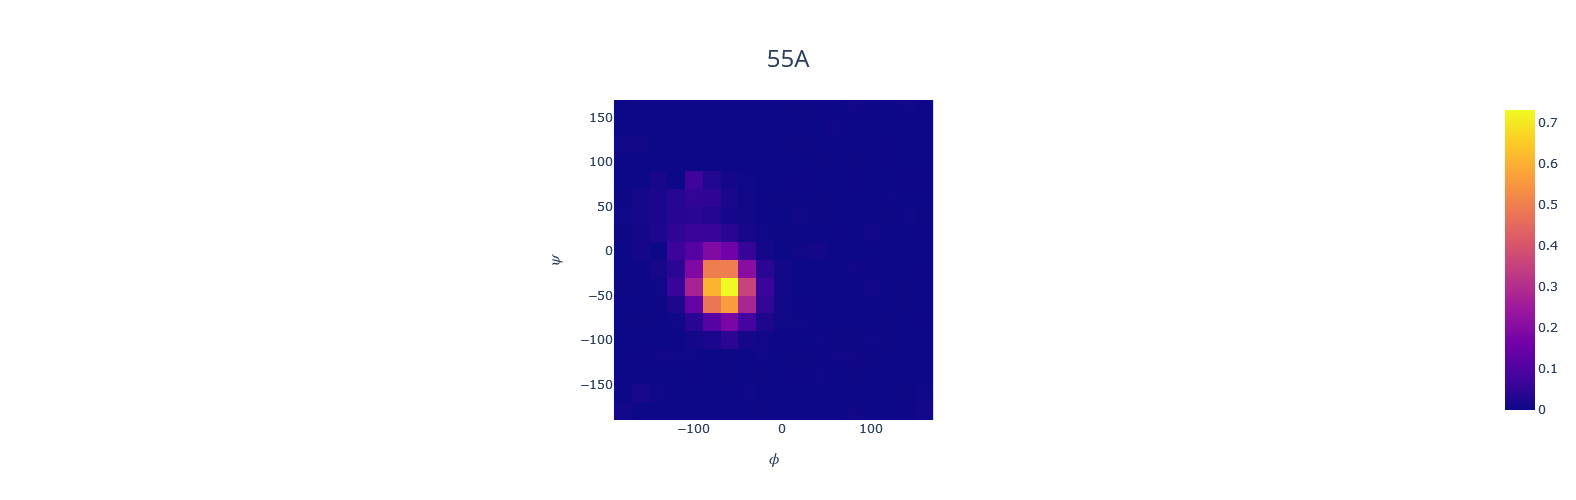

In [220]:
#@markdown Ramachandran map for one residue:

rama = predictions[residue(res_num)]
rama = np.rot90(rama.reshape(18,18), 1)

fig = px.imshow(rama,
                labels=dict(x="$$\phi$$", y="$$\psi$$"),
                width=500, height=500, #size in pixels
                x=np.linspace(-180, 160, 18), #(-180, None, None, None, None, -80,  None, None, None, 0, None, None, None, 80, None, None, None, 160),
                y=np.flip(np.linspace(-180, 160, 18)), origin="lower", # THIS WONT WORK
                #y=(170, None, None, None, None, 70,  None, None, None, -10, None, None, None, -90, None, None, None, -170) ### THIS WONT WORK
                #y=np.linspace(-180, 160, 18) #THIS WORKS but the axis is flipped
                title=f"{residue(res_num)}",
               )
#fig.update_traces(colorscale="YlGnBu", hoverinfo="x+y")
fig.update_layout(title=dict(x=0.5, y=0.9, font=dict(family="Open Sans", size=24)))

fig.show()

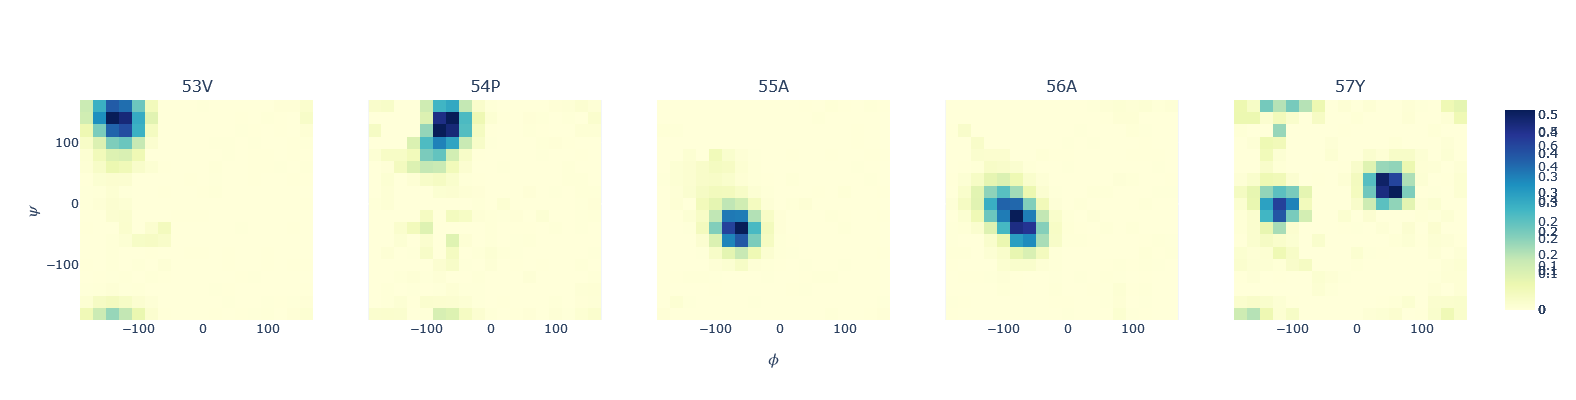

In [219]:
#@markdown Ramachandran map for 5 residues
#@markdown Middle residue number:
res_num=55  #@param {type:"integer"} 

subplot_titles = []

for rn in range(res_num-2, res_num+3):
    if str(rn) in res_w_predictions:
        subplot_titles.append(residue(rn))
    else:
        continue
        
ncols = len(subplot_titles)
nrows = 1

fig = make_subplots(rows=nrows, cols=ncols, shared_xaxes=True, shared_yaxes=True, start_cell='top-left', 
                              subplot_titles=subplot_titles, column_widths=None, row_heights=None, specs=None, insets=None, x_title="$$\phi$$", y_title="$$\psi$$", figure=None)

fig.update_layout(width=ncols*300, height=nrows*300+100)

for i, res in enumerate(subplot_titles):
    #print(i, res)
    rama = predictions[res]
    rama = np.rot90(rama.reshape(18,18), 1)
    fig.add_heatmap(z=rama,
            x=np.linspace(-180, 160, 18), #(-180, None, None, None, None, -80,  None, None, None, 0, None, None, None, 80, None, None, None, 160),
            y=np.flip(np.linspace(-180, 160, 18)), # THIS WONT WORK
            row = 1, col = i+1,
                   )
fig.update_traces(colorscale="YlGnBu", hoverinfo="x+y")
fig.show()